# Data: https://www.kaggle.com/rahulsathyajit/shark-tank-pitches

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
%matplotlib inline

In [2]:
df = pd.read_csv('shark_tank.csv')

In [3]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [5]:
int(df.deal[0])

0

In [6]:
df.deal=(df.deal).astype(int)

In [7]:
df['Multiple Entreprenuers']=(df['Multiple Entreprenuers']).astype(int)

In [8]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


In [9]:
df.category.value_counts()

Specialty Food                                 62
Novelties                                      35
Baby and Child Care                            24
Online Services                                22
Personal Care and Cosmetics                    20
Toys and Games                                 19
Storage and Cleaning Products                  17
Outdoor Recreation                             16
Electronics                                    14
Entertainment                                  13
Pet Products                                   13
Consumer Services                              13
Kitchen Tools                                  12
Women's Apparel                                10
Professional Services                          10
Automotive                                     10
Baby and Children's Entertainment               9
Men and Women's Apparel                         9
Holiday Cheer                                   8
Women's Accessories                             8


In [10]:
for i in range(len(df)):
    df.location.iloc[i]=df.location[i].split(',')[1]

In [11]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


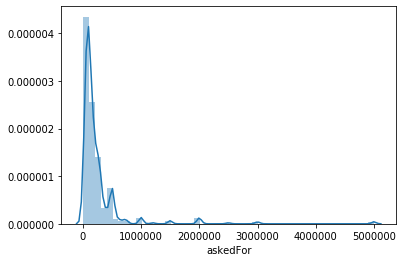

In [12]:
sns.distplot(df.askedFor)

In [13]:
df['website_length']=0
for i in range(len(df)):
    try:
        df['website_length'][i]=len(df.website[i])
    except:
        df['website_length'][i]=0

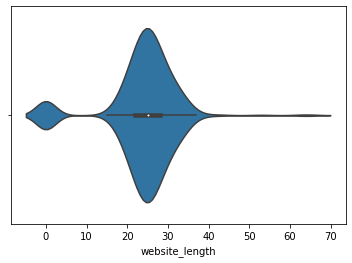

In [14]:
sns.violinplot(df.website_length)

In [15]:
pd.cut(df.website_length,bins=3).unique()

[(-0.065, 21.667], (21.667, 43.333], (43.333, 65.0]]
Categories (3, interval[float64]): [(-0.065, 21.667] < (21.667, 43.333] < (43.333, 65.0]]

In [16]:
df.website_length=pd.cut(df.website_length,bins=3,labels=['short','medium','long'])

In [17]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,website_length
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0,short
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0,short
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0,medium
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0,medium
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0,medium


In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

In [ ]:
i=1
j=0
colors=['red','blue','yellow']
plt.figure(figsize=(15,8))
for col in ['askedFor','valuation','exchangeForStake']:
    plt.subplot(2,2,i)
    sns.violinplot(df[col],color=colors[j])
    i=i+1
    j+=1

In [ ]:
def filter_outliers(dataframe,threshold):
    """
    Input a data frame and have all outliers filtered to a certain and custom threshold of standard deviations
    """
    dataframe = dataframe[(np.abs(stats.zscore(dataframe)) <= threshold).all(axis=1)]
    return dataframe

In [ ]:
df.shape

In [ ]:
df.website_length=df.website_length.astype(str)

In [ ]:
df.info()

In [ ]:
df_filter_num = filter_outliers(df.select_dtypes(include=[int,float]),2)

In [ ]:
i=1
j=0
colors=['red','blue','yellow']
plt.figure(figsize=(15,8))
for col in ['askedFor','valuation','exchangeForStake']:
    plt.subplot(2,2,i)
    sns.violinplot(df_filter_num[col],color=colors[j])
    i=i+1
    j+=1

In [ ]:
df_filter_num['asked_size']=pd.cut(df_filter_num.askedFor,bins=3,labels=['small','medium','large'])
df_filter_num['value_size']=pd.cut(df_filter_num.askedFor,bins=3,labels=['small','medium','large'])

In [ ]:
df_filter_cat = df[df.index.isin(df_filter_num.index)].select_dtypes(include='O')

In [ ]:
df_filter_cat.head()

In [ ]:
df_filter=pd.concat([df_filter_cat,df_filter_num],axis=1)

In [ ]:
print(df_filter.shape)
df_filter.head()

In [ ]:
df_filter.reset_index(inplace=True)

In [ ]:
df_filter.head()

In [ ]:
df_filter.drop('index',axis=1,inplace=True)

In [ ]:
df_filter.shape

In [ ]:
sns.distplot(df_filter.askedFor)

In [ ]:
df_filter.head()

In [ ]:
df_filter.website.fillna('none',inplace=True)

In [ ]:
for i in range(len(df_filter)):
    if df_filter.website[i]=='none':
        df_filter.website[i]=0
    else:
        df_filter.website[i]=1

In [ ]:
df_filter.head()

In [ ]:
df_filter.category.value_counts()

In [ ]:
pitch_cat_df=pd.get_dummies(df_filter.category)

In [ ]:
pitch_cat_df=pitch_cat_df.drop("Women's Shoes",axis=1)

In [ ]:
for col in pitch_cat_df.columns:
    df_filter[col]=pitch_cat_df[col]

In [ ]:
df_filter.head()

In [ ]:
df_filter.columns

In [ ]:
df_filter.head()

In [ ]:
df_filter['sharks']=None

In [ ]:
for i in range(len(df_filter)):
    df_filter['sharks'][i]=[]

In [ ]:
for i in range(len(df_filter)):
    df_filter['sharks'][i].append([df_filter.shark1[i],df_filter.shark2[i],df_filter.shark3[i],df_filter.shark4[i],df_filter.shark5[i]])

In [ ]:
df_filter.head()

In [ ]:
for i in range(len(df_filter)):
    df_filter.sharks[i]=df_filter.sharks[i][0]

In [ ]:
df_filter.head()

In [ ]:
df_filter.info()

In [ ]:
df_filter.sharks.astype(str).unique()

In [ ]:
sharks_dict={
    'group_1':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Kevin Harrington'],
    'group_2':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_3':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Jeff Foxworthy', 'Daymond John'],
    'group_4':['Lori Greiner', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_5':['Lori Greiner', 'Barbara Corcoran', 'Robert Herjavec', "Kevin O\'Leary", 'Mark Cuban'],
    'group_6':['Lori Greiner', "Kevin O'Leary", 'Daymond John', 'Mark Cuban', 'John Paul DeJoria'],
    'group_7':['Lori Greiner', 'Steve Tisch', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_8':['Lori Greiner', "Kevin O'Leary", 'Daymond John', 'Mark Cuban', 'Nick Woodman']
}

In [ ]:
df_filter['shark_group']=None

In [ ]:
for i in range(len(df_filter)):
    if df_filter.sharks[i]==sharks_dict['group_1']:
        df_filter.shark_group[i]=1
    elif df_filter.sharks[i]==sharks_dict['group_2']:
        df_filter.shark_group[i]=2
    elif df_filter.sharks[i]==sharks_dict['group_3']:
        df_filter.shark_group[i]=3
    elif df_filter.sharks[i]==sharks_dict['group_4']:
        df_filter.shark_group[i]=4
    elif df_filter.sharks[i]==sharks_dict['group_5']:
        df_filter.shark_group[i]=5
    elif df_filter.sharks[i]==sharks_dict['group_6']:
        df_filter.shark_group[i]=6
    elif df_filter.sharks[i]==sharks_dict['group_7']:
        df_filter.shark_group[i]=7
    else:
        df_filter.shark_group[i]=8

In [ ]:
df_filter.columns

In [ ]:
df_filter.iloc[:,0:15].head()

In [ ]:
df_filter.iloc[:,15:30].head()

In [ ]:
df_filter.iloc[:,30:45].head()

In [ ]:
df_filter.iloc[:,45:].head()

In [ ]:
df_filter.columns

In [ ]:
df_filter=df_filter[['deal','description','category', 'entrepreneurs', 'location', 'website', 'website_length','shark1',
       'shark2', 'shark3', 'shark4', 'shark5','sharks',
       'shark_group' ,'title', 'episode-season', 'episode', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'Multiple_Entreprenuers', 'asked_size', 'value_size',
       'Alcoholic Beverages', 'Automotive', 'Baby and Child Care',
       "Baby and Children's Apparel and Accessories",
       "Baby and Children's Bedding", "Baby and Children's Entertainment",
       "Baby and Children's Food", 'Consumer Services', 'Costumes', 'Cycling',
       'Education', 'Electronics', 'Entertainment', 'Fashion Accessories',
       'Fitness Apparel and Accessories', 'Fitness Equipment',
       'Fitness Programs', 'Furniture', 'Gardening', 'Golf Products',
       'Health and Well-Being', 'Holiday Cheer', 'Home Accessories',
       'Home Improvement', 'Home Security Solutions', 'Homeopathic Remedies',
       'Kitchen Tools', 'Maternity', "Men and Women's Accessories",
       "Men and Women's Apparel", "Men and Women's Shoes", "Men's Accessories",
       'Mobile Apps', 'Music', 'Non-Alcoholic Beverages', 'Novelties',
       'Online Services', 'Outdoor Recreation', 'Party Supplies',
       'Personal Care and Cosmetics', 'Pest Control', 'Pet Products',
       'Productivity Tools', 'Professional Services', 'Specialty Food',
       'Storage and Cleaning Products', 'Toys and Games',
       'Undergarments and Basics', 'Water Bottles', 'Weddings',
       'Wine Accessories', "Women's Accessories", "Women's Apparel"]]

In [ ]:
df_filter.head()

In [ ]:
df_filter_basic=df_filter.iloc[:,0:24]
df_filter_dummies=df_filter.iloc[:,24:]

In [ ]:
#df_filter_basic.to_csv('cleaned_shark.csv')

# I need to address categorical data numerically

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.7),cmap='plasma')
plt.tight_layout()
plt.title('correlation between features matchin 70% or higher')
plt.show()

In [ ]:
df_filter_basic.info()

In [ ]:
def target_encode(df,target,col):
    
    dummy_dict = {}
    dummy_df = df[[col,target]].groupby(col,as_index=False).mean()
    for i in range(len(dummy_df)):
        dummy_dict[dummy_df.iloc[i,0]]=dummy_df.iloc[i,1]
    df[col]=df[col].map(lambda x: dummy_dict[x])
    
    return df[col]

In [ ]:
df_filter_basic.columns

In [ ]:
# drop unique and un-needed values
df_filter_basic.drop(['description','sharks','title','episode-season','category','entrepreneurs'],axis=1,inplace=True)

In [ ]:
df_filter_basic.info()

In [ ]:
df_filter_basic.shark_group=df_filter_basic.shark_group.astype(float)

In [ ]:
df_filter_basic.info()

In [ ]:
for col in df_filter_basic.select_dtypes(exclude=[int,float]).columns:
    df_filter_basic[col]=target_encode(df_filter_basic,'deal',col)

In [ ]:
df_filter_basic.info()

In [ ]:
for col in df_filter_basic.columns:
    df_filter_basic[col]=df_filter_basic[col].astype(float)

In [ ]:
df_filter_basic.info()

In [ ]:
for col in df_filter_dummies.columns:
    df_filter_dummies[col]=df_filter_dummies[col].astype(float)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.7),cmap='mako')
plt.tight_layout()
plt.title('correlation between features matchin 70% or higher')
plt.show()

In [ ]:
df_filter_basic.drop(['season','value_size'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.8),cmap='magma_r')
plt.tight_layout()
plt.title('correlation between features matchin 80% or higher')
plt.show()

In [ ]:
df_filter_basic.drop(['shark_group'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.85),cmap='summer')
plt.tight_layout()
plt.title('correlation between features matchin 85% or higher')
plt.show()

# I'd like to keep info on which shark was in even though it has high correlation